In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("credit_train.csv")

In [3]:
df.drop(['Loan ID', 'Customer ID','Months since last delinquent'],axis=1,inplace=True)

In [5]:
cat=df.select_dtypes(include="object")
num=df.select_dtypes(include="number")

In [6]:
df['Credit Score'].fillna(0,inplace=True)

In [7]:
df['Current Loan Amount'].fillna(value=df['Current Loan Amount'].median(),inplace=True)

In [8]:
df['Annual Income'].fillna(value=df['Annual Income'].median(),inplace=True)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
cat=pd.get_dummies(cat,dtype='int')
x=pd.concat([cat,num],axis=1)

In [11]:
df['Loan Status'].value_counts()

Fully Paid     74257
Charged Off    21315
Name: Loan Status, dtype: int64

In [12]:
df['Term']=df.Term.convert_objects(convert_numeric=True)

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [13]:
import seaborn as sns
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

In [15]:
df['Credit Score_range']=pd.cut(df['Credit Score'],[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7510],right=True)

In [16]:
df['Annual Income Range']=pd.cut(df['Annual Income'],[50000,250000,500000,1000000,2000000,5000000,200000000],
                                 labels=['Poor','Working Class','Lower Middle Class','Middle Class','Upper Middle Class','High Class'],
                                 right=True)

In [18]:
def mapping(df):
    if df>=717:
        return 'Low Risky'
    else:
        return 'High Risky'

In [19]:
df['Loan Risky']=df['Credit Score'].apply(mapping)

In [21]:
test_data=df[df['Credit Score']==0]
train_data=df[df['Credit Score']!=0]

In [24]:
loan_train_y=train_data['Credit Score']
loan_train_x=train_data[['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance']]

In [25]:
loan_cat=loan_train_x.select_dtypes(include='object')
loan_num=loan_train_x.select_dtypes(include='number')

In [26]:
loan_train_x=loan_num

In [29]:
loan_test_y=test_data['Credit Score']
loan_test_x=test_data[['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance']]

In [30]:
loan_test_cat=loan_test_x.select_dtypes(include='object')
loan_test_num=loan_test_x.select_dtypes(include='number')

In [31]:
loan_test_x=loan_test_num

In [32]:
lin_model=Ridge().fit(loan_train_x,loan_train_y)
predicted_Credit_scores=lin_model.predict(loan_test_x)

In [34]:
predicted_Credit_scores

array([1142.69140881, 1135.63389124, 1129.35412038, ..., 1130.5600084 ,
       1142.81944729, 1126.37741558])

In [35]:
print("Mean Squared Error:",mean_squared_error(loan_test_y,predicted_Credit_scores))

Mean Squared Error: 1286932.1524913372


In [36]:
print("R2 value:",r2_score(loan_test_y,predicted_Credit_scores))

R2 value: 0.0


In [37]:
lin_model.intercept_

1148.2137520625513

In [38]:
lin_model.coef_[1]

-2.375485581319042e-05

In [39]:
lin_model.coef_

array([-4.03469799e-06, -2.37548558e-05,  6.10184192e-04,  1.35294090e-05])

In [40]:
loan_test_x['Credit Score']=predicted_Credit_scores

In [41]:
loan_train_x['Credit Score']=loan_train_y

In [42]:
total_data=pd.concat([loan_train_x,loan_test_x],axis=0)

In [45]:
total_data['Loan Status']=df['Loan Status'].replace(to_replace=["Fully Paid","Charged Off"],value=["1","0"])

In [46]:
total_data.reset_index(drop=True,inplace=True)

In [48]:
gx=df['Annual Income']
gy=df['Credit Score']
def standardize(gx):
    return (gx-np.mean(gx))/np.std(gx)

In [49]:
DX=standardize(gx)
DX=np.c_[np.ones(gx.shape[0]),DX]
print(DX)

[[ 1.         -0.19087867]
 [ 1.         -0.18412922]
 [ 1.          0.88635972]
 ...
 [ 1.         -0.06748496]
 [ 1.         -0.2080311 ]
 [ 1.          0.36578712]]


In [50]:
alpha=0.01
m=gy.size
np.random.seed(23)
theta=np.random.rand(2)
iterations=2000

In [51]:
def gradient_descent(gx,gy,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    print(past_thetas)
    for i in range(iterations):
        prediction=np.dot(gx,theta) 
        error=prediction-gy 
        cost=1/(m)*np.dot(error.T,error) 
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(gx.T,error)) 
        past_thetas.append(theta)
    return past_costs,past_thetas
past_costs,past_thetas=gradient_descent(DX,gy,theta,alpha,iterations)

[array([0.51729788, 0.9469626 ])]


In [52]:
print(past_thetas[-1])

[866.52910733  17.63315359]


[[ 1.         -0.35710958]
 [ 1.         -0.3628579 ]
 [ 1.          2.76862514]
 ...
 [ 1.          2.76862514]
 [ 1.         -0.36785608]
 [ 1.         -0.35444333]]
[array([0.51729788, 0.9469626 ])]
[866.52910733 -50.69292861]


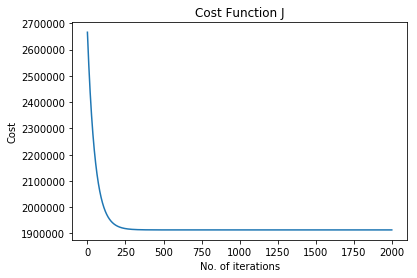

In [54]:
gx=df['Current Loan Amount']
gy=df['Credit Score']
def standardize(gx):
    return (gx-np.mean(gx))/np.std(gx)

DX=standardize(gx)
DX=np.c_[np.ones(gx.shape[0]),DX]
print(DX)

alpha=0.01
m=gy.size
np.random.seed(23)
theta=np.random.rand(2)
iterations=2000

def gradient_descent(gx,gy,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    print(past_thetas)
    for i in range(iterations):
        prediction=np.dot(gx,theta) 
        error=prediction-gy 
        cost=1/(m)*np.dot(error.T,error) 
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(gx.T,error)) 
        past_thetas.append(theta)
    return past_costs,past_thetas
past_costs,past_thetas=gradient_descent(DX,gy,theta,alpha,iterations)

print(past_thetas[-1])

plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc_curve

In [56]:
target= total_data['Loan Status']
ind_vars= total_data.loc[:,total_data.columns!='Loan Status']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(ind_vars,target,test_size=0.2,random_state=35)

In [58]:
lg_model=LogisticRegression().fit(x_train,y_train)
lg_predicted_values=lg_model.predict(x_test)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
print(sm.accuracy_score(y_test,lg_predicted_values)*100)

81.78393931467434


In [60]:
print(sm.confusion_matrix(y_test,lg_predicted_values))

[[  836  3435]
 [   47 14797]]


In [61]:
print(sm.classification_report(y_test,lg_predicted_values))

              precision    recall  f1-score   support

           0       0.95      0.20      0.32      4271
           1       0.81      1.00      0.89     14844

   micro avg       0.82      0.82      0.82     19115
   macro avg       0.88      0.60      0.61     19115
weighted avg       0.84      0.82      0.77     19115



In [63]:
decisionTree_model=DecisionTreeClassifier(criterion='gini').fit(x_train,y_train)
train_predictions=decisionTree_model.predict(x_train)
test_predictions=decisionTree_model.predict(x_test)

In [64]:
print("Decision Tree Train Accuracy:",sm.accuracy_score(y_train,train_predictions))
print("Decision Tree Test Accuracy:",sm.accuracy_score(y_test,test_predictions))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7544336908187288


In [65]:
print(sm.classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43      4271
           1       0.84      0.85      0.84     14844

   micro avg       0.75      0.75      0.75     19115
   macro avg       0.64      0.64      0.64     19115
weighted avg       0.75      0.75      0.75     19115



C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


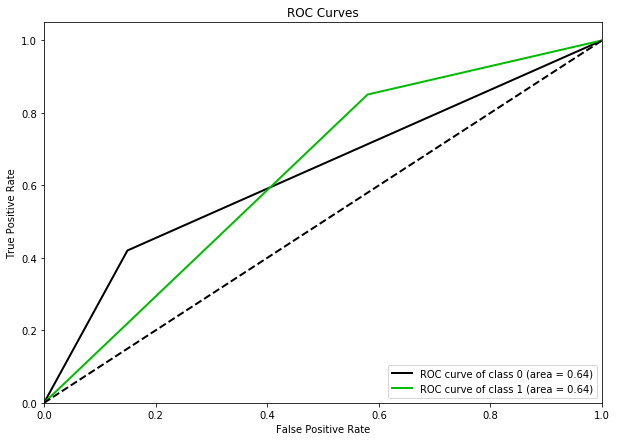

In [66]:
y_pred_probs = decisionTree_model.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

In [68]:
RF_clf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True)
RF_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [69]:
rf_train_predictions=RF_clf.predict(x_train)
print("Random Forest Train Accuracy:",sm.accuracy_score(y_train,rf_train_predictions)*100)

rf_predictions=RF_clf.predict(x_test)
print("Random Forest Test Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

Random Forest Train Accuracy: 99.99869207528414
Random Forest Test Accuracy: 81.41773476327492


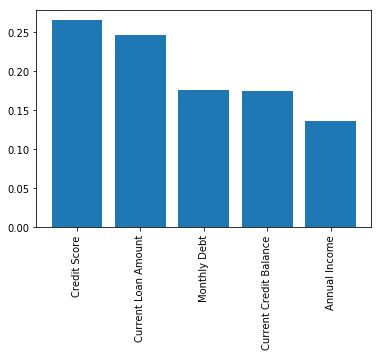

In [70]:
imp_features=RF_clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:10]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

In [72]:
params = {'max_depth': range(1,10,2),
          'max_features': ['auto', 'sqrt','log2'],
          'n_estimators': [20, 40, 60, 80, 100, 120],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'cv': [3,6,10]
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(x_train, y_train)

print(Grid_randomF.best_params_)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter cv for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=15, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True,**Grid_randomF.best_params_)
clf.fit(x_train,y_train)

In [ ]:
clf_score = cross_val_score(clf, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()